In [1]:
!pip install keras-tuner
#Keras tuner is a technique of hyperparameter tuning.. to help us get our best desired results.
#we are using this keras tuner to determine best convolution layers do we need, filters for each layers, e.t.c.


In [2]:
import tensorflow as tf


In [3]:
from tensorflow import keras
from keras.models import Sequential

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

In [6]:
train_image = train_image / 255.0   #So as to convert our grey-scale pixels into 0 to 1, to enable fast running of our data, 
test_image = test_image / 255.0

In [7]:
train_image[0].shape

(28, 28)

In [8]:
len(test_image)

10000

In [9]:
train_image = train_image.reshape(len(train_image),28,28,1)
test_image = test_image.reshape(len(test_image),28,28,1)

In [10]:
def build_model(hp):
  model = Sequential([
                      keras.layers.Conv2D(
                          filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),
                      kernel_size = hp.Choice('kernel_conv1', values = [3,5]),
                      activation = 'relu',
                      input_shape = [28,28,1]),
                      keras.layers.MaxPool2D(pool_size=(2,2), strides = (1,1), padding = 'same'),
                      keras.layers.Conv2D(
                          filters = hp.Int('conv_2_filter', min_value = 32, max_value = 128, step = 16),
                          kernel_size = hp.Choice('kernel_conv2', values = [3,5]),
                          activation = 'relu'
                      ),
                      keras.layers.MaxPool2D(pool_size = (2,2), strides = (1,1), padding = 'same'),
                      keras.layers.Flatten(),
                      keras.layers.Dense(units = hp.Int('Dense_1_units', min_value = 32, max_value = 128, step= 16),
                                         activation = 'relu'),
                      keras.layers.Dropout(0.3),
                      keras.layers.Dense(10, activation = 'softmax')  #This is like the output layer
 
  ])
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning rate', values = [0.01, 0.001])), loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [11]:

from kerastuner import RandomSearch

In [12]:
from kerastuner.engine.hyperparameters import HyperParameters

In [13]:
tuner_search = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, directory = 'Output', project_name = 'FashioN Mnist')

INFO:tensorflow:Reloading Oracle from existing project Output/FashioN Mnist/oracle.json
INFO:tensorflow:Reloading Tuner from Output/FashioN Mnist/tuner0.json


In [14]:

tuner_search.search(train_image, train_labels, epochs = 3, validation_split = 0.3)


INFO:tensorflow:Oracle triggered exit


In [15]:
model = tuner_search.get_best_models(num_models=1)[0]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 48)        1248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 80)        34640     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 80)        0         
_________________________________________________________________
flatten (Flatten)            (None, 38720)             0         
_________________________________________________________________
dense (Dense)                (None, 112)               4336752   
_________________________________________________________________
dropout (Dropout)            (None, 112)               0

In [17]:
model_history = model.fit(train_image, train_labels, epochs = 10, verbose = 1, validation_split=0.3, initial_epoch=3)

Epoch 4/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2209 - accuracy: 0.9184 - val_loss: 0.2268 - val_accuracy: 0.9161
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1954 - accuracy: 0.9273 - val_loss: 0.2213 - val_accuracy: 0.9205
Epoch 6/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1729 - accuracy: 0.9347 - val_loss: 0.2181 - val_accuracy: 0.9210
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1519 - accuracy: 0.9419 - val_loss: 0.2239 - val_accuracy: 0.9256
Epoch 8/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1370 - accuracy: 0.9489 - val_loss: 0.2531 - val_accuracy: 0.9207
Epoch 9/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1224 - accuracy: 0.9523 - val_loss: 0.2431 - val_accuracy: 0.9239
Epoch 10/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1098 - accuracy: 0.9577 - val_loss: 0.2637 - val_accuracy

In [18]:
import numpy as np

y_pred = np.argmax(model.predict(test_image), axis = -1)



In [19]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
#saving the model
model.save('fashionmnist.h5')



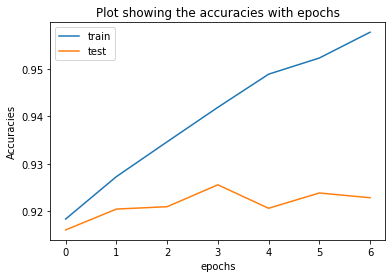

In [21]:
acc = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['loss']
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(acc)
plt.plot(val_accuracy)
plt.xlabel('epochs')
plt.ylabel('Accuracies')
plt.title('Plot showing the accuracies with epochs')
plt.legend(['train', 'test'], loc = 'best')
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [23]:
accuracy_score(test_labels, y_pred)

0.9131

In [24]:
y_pred = y_pred.astype(dtype = 'uint8')

In [25]:
train_image.shape


(60000, 28, 28, 1)

In [26]:


#Data Visualization, so let's visualize our images, our fashion images.. i'll like to get 100 samples. 
import random

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

row = 20
col = 5

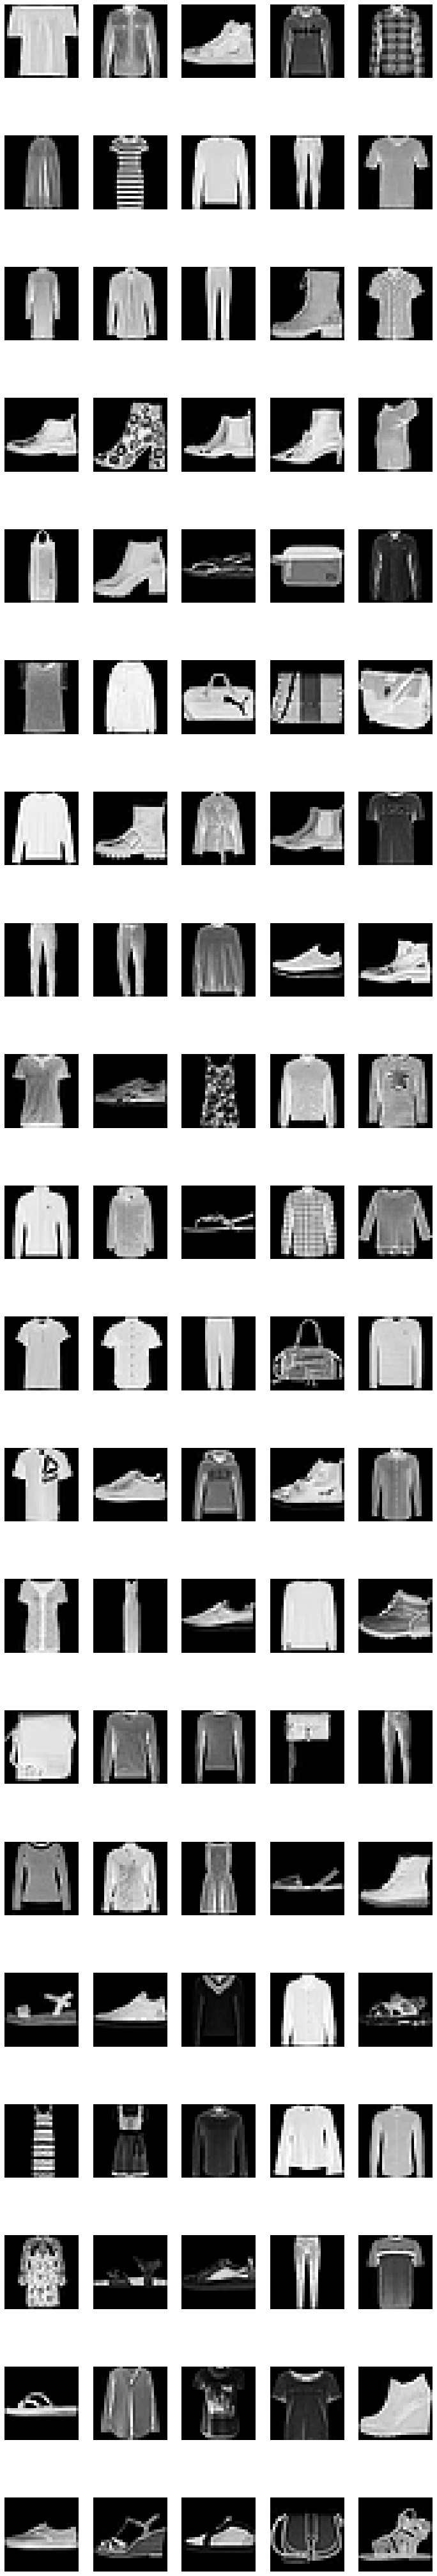

In [28]:
sample = random.sample(range(train_image.shape[0]), row*col)
image_sample = train_image[sample,:,:,:]
label_sample = train_labels[sample]
fig, ax = plt.subplots(row,col, figsize = (12,75))
r = 0
c = 0
for i in range(row * col):
  ax[r,c].imshow(image_sample[i,:,:,:].reshape(28,28), cmap ='gray')
  ax[r,c].axis('off')
  c += 1
  if c == col:
    c = 0
    r += 1

plt.show()

In [29]:
#Since we have made our predictions .. and we got 91.65% accuracy, it means that there are small accountable errors.. which we can see by visualizing
error_index = (test_labels != y_pred)
test_images_error = test_image[error_index]
test_labels_error = test_labels[error_index]
predictions_error = y_pred[error_index]


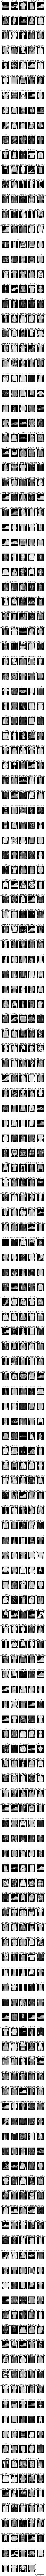

In [30]:
#Here we are all dealing with Errors

x_samp = test_images_error
y_samp = test_labels_error

cols = 5
rows = int(np.floor(sum(error_index)/5))

fig, ax = plt.subplots(rows, cols, figsize = (12,750))
r = 0
c = 0
for i in range((rows * cols)-1):
  ax[r,c].imshow(x_samp[i].reshape(28,28), cmap ='gray')
  ax[r,c].axis('off')
  class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  label_index = int(test_labels_error[i])
  label_error_index = int(predictions_error[i])
  pred_lab = class_names[label_error_index]
  actual_lab = class_names[label_index]
  ax[r,c].set_title(f'Actual label : {actual_lab}\nPredicted Label: {pred_lab}')
  c+=1
  if c == cols:
    c = 0
    r += 1
plt.show()
